#### Data Preprocessing 
- titanic dataset 
    - Passengerid : 탑승자 데이터 일련번호 
    - Survived : 생존 여부 
        - 0 = 사망 
        - 1 = 생존 
    - Pclass : 티켓의 선실 등급 
        - 1 = 일등석 
        - 2 = 이등석 
        - 3 = 삼등석 
    - Sex : 성별 
    - Age : 나이 
    - SibSp : 같이 탑승한 형제 자매 또는 배우자 인원 수 
    - Parch : 같이 탐승한 부모님 또는 어린이 인원 수
    - Ticket : 티켓번호 
    - Fare : 요금 
    - Cabin : 선실 번호 
    - Embarked : 중간 정착 항구 
        - C = Cherbourg 
        - Q = Queenstown 
        - S = Southampton 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

titanic_df = pd.read_csv("File\\titanic_train.csv")
titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# titanic_df.describe()
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)
titanic_df.Cabin.fillna("N", inplace=True)
titanic_df.Embarked.fillna("N", inplace=True)
print(f"null value count of titanic dataset {titanic_df.isnull().sum().sum()}")

null value count of titanic dataset 0


In [9]:
titanic_df.dtypes[titanic_df.dtypes=="object"].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
print(f"Distributuin of Sex values  :\n{titanic_df['Sex'].value_counts()}")
print(f"Distributuin of Cabin values  :\n{titanic_df['Cabin'].value_counts()}")
print(f"Distributuin of Embarked values  :\n{titanic_df['Embarked'].value_counts()}")

Distributuin of Sex values  :
male      577
female    314
Name: Sex, dtype: int64
Distributuin of Cabin values  :
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Distributuin of Embarked values  :
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [15]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
titanic_df["Cabin"].head(n=10)

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object

In [17]:
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [18]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

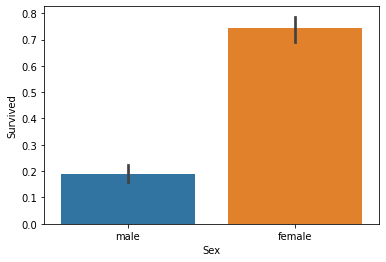

In [19]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

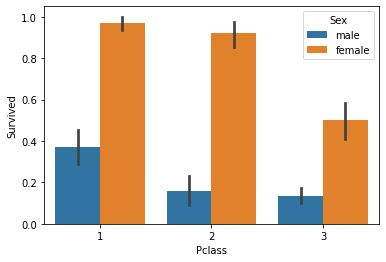

In [23]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

In [24]:
titanic_df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

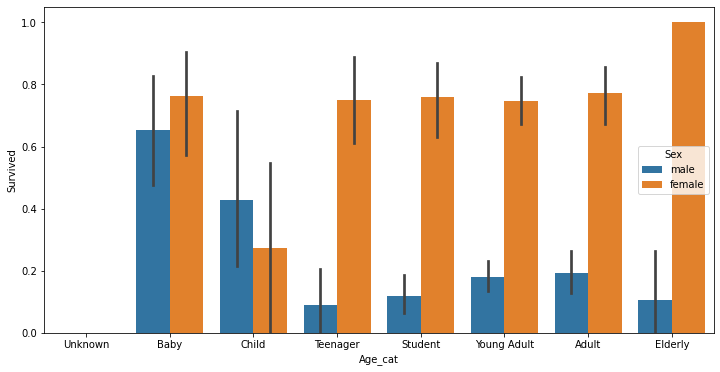

In [29]:
def get_category(age):
    cat = ""
    if age <= -1 : 
        cat = "Unknown" 
    elif age <= 5 :
        cat = "Baby"
    elif age <= 12 : 
        cat ="Child"
    elif age <= 18 : 
        cat ="Teenager"
    elif age <= 25 : 
        cat ="Student"
    elif age <= 35 : 
        cat ="Young Adult"
    elif age <= 60 : 
        cat ="Adult"
    else  : 
        cat ="Elderly"
    return cat 

plt.figure(figsize=(12, 6))

group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x: get_category(x))

sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)


    
     

In [30]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ["Cabin", "Sex", "Embarked"]
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF 

titanic_df = encode_features(titanic_df)
titanic_df.head(n=10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,7,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,4,3
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,7,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,7,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,7,0
